# AdaBoost: Classifying Player Positions

## What is AdaBoost?
AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that:
1. Combines multiple weak learners into a strong classifier
2. Adapts to difficult-to-classify examples by giving them more weight
3. Builds classifiers sequentially, each trying to correct errors from previous ones

## Our Task
We'll use AdaBoost to classify EA FC 24 players as either offensive or defensive based on their attributes. This should improve upon our basic decision tree classifier.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme
sns.set_theme()

## Data Preparation
We'll use the same features as our decision tree classifier:
- Shooting, Pace, Dribbling (offensive indicators)
- Defending, Physical (defensive indicators)

AdaBoost should be particularly effective at identifying players with mixed attributes by focusing on the hard-to-classify cases.

In [20]:
players_df = pd.read_csv("../data/players_data.csv")

# Define offensive and defensive positions
offensive_positions = ['ST', 'CF', 'LW', 'RW', 'CAM']
defensive_positions = ['CB', 'LB', 'RB', 'CDM', 'LWB', 'RWB']

# Create target variable (1 for offensive, 0 for defensive)
def get_position_class(position_str):
    positions = str(position_str).split(', ')
    if any(pos in offensive_positions for pos in positions):
        return 1
    elif any(pos in defensive_positions for pos in positions):
        return 0
    return None

# Prepare the data
players_df['position_class'] = players_df['player_positions'].apply(get_position_class)

# Filter only offensive and defensive players
filtered_df = players_df[players_df['position_class'].notna()]

features = ["shooting", "defending", "pace", "dribbling", "physic"]
X = filtered_df[features].values
y = filtered_df['position_class'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_36619/3952018943.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [21]:
# Create and train AdaBoost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=10,
    algorithm="SAMME",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

# Make predictions
ada_y_pred = ada_clf.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


## Model Evaluation

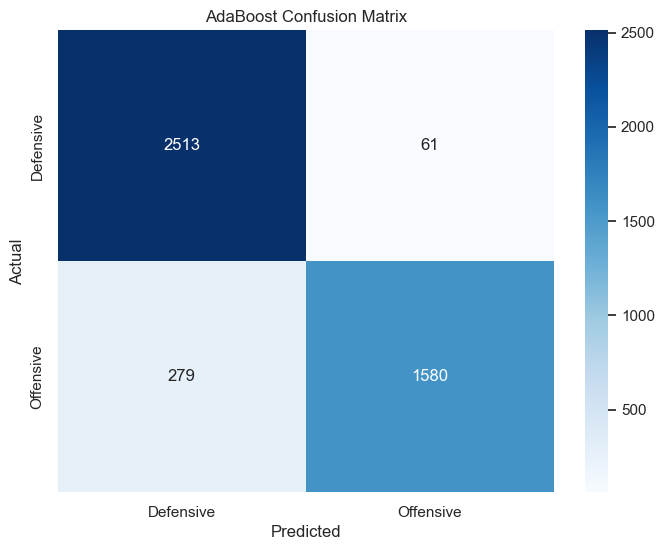


Classification Report:
              precision    recall  f1-score   support

   Defensive       0.90      0.98      0.94      2574
   Offensive       0.96      0.85      0.90      1859

    accuracy                           0.92      4433
   macro avg       0.93      0.91      0.92      4433
weighted avg       0.93      0.92      0.92      4433



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(y_test, ada_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Defensive', 'Offensive'],
            yticklabels=['Defensive', 'Offensive'])
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, ada_y_pred, target_names=['Defensive', 'Offensive']))

## Feature Importance Analysis

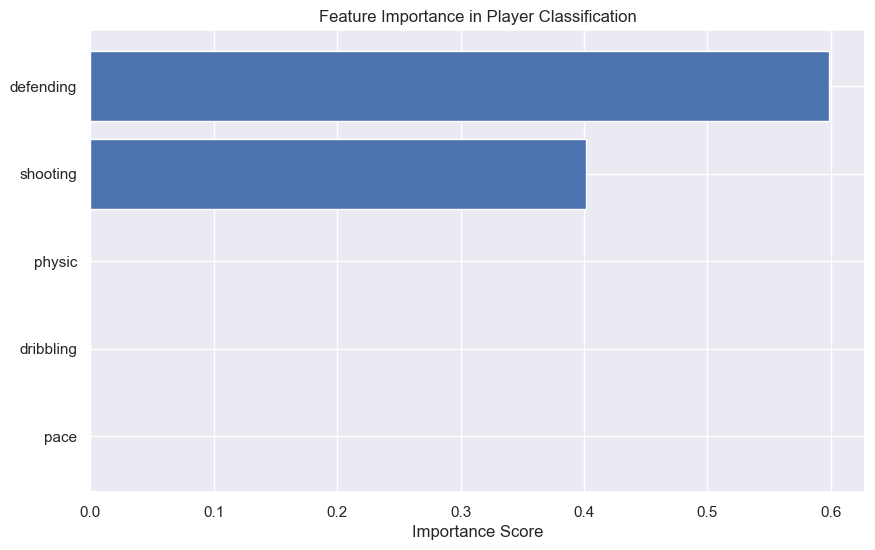

In [23]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': ada_clf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Player Classification')
plt.xlabel('Importance Score')
plt.show()